In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

In [4]:
keras.__version__

'2.2.4-tf'

In [5]:
tf.__version__

'1.15.0'

In [6]:
fashion_mnist = keras.datasets.fashion_mnist

In [7]:
(x_train_full, y_train_full), (x_test,y_test) = fashion_mnist.load_data()

In [8]:
x_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
x_train_full.shape

(60000, 28, 28)

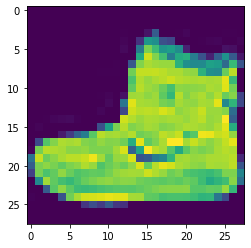

In [10]:
plt.imshow(x_train_full[0])

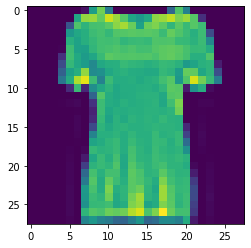

In [11]:
plt.imshow(x_train_full[10])

In [12]:
y_train_full[0]

9

In [13]:
class_names = ["T-shirt/top","Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [14]:
class_names[y_train_full[10]]

'T-shirt/top'

In [15]:
x_train_full[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

## Data normalization

we then normalize the data dimensions so that they are of approx the same scale

In [16]:
x_train_n = x_train_full / 255
x_test_n = x_test / 255

## Split the data into train/validation/test datasets

we had 60,000 datasets for training and 10,000 test datasets. Now we futher split the training data into
train/validation. Here is how each type of dataset is used in deep learning

In [17]:
x_valid, x_train = x_train_n[:5000], x_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test_n

In [18]:
x_valid

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [19]:
x_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Create the model architecture
there are two APIs for defining a model in Keras
* Sequential model API
* Functional API

In [21]:
np.random.seed(42)
#tf.random.set_seed(42)
#tf.random.set_seed(42)

In [22]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


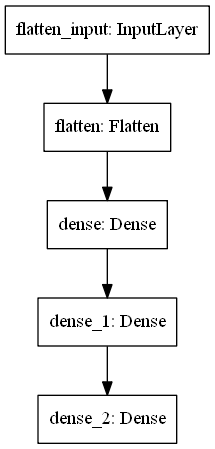

In [24]:
import pydot
keras.utils.plot_model(model)

In [25]:
#pip install pydot

we can access the parameters using get_weight()method

In [26]:
weights, biases = model.layers[1].get_weights()

In [27]:
weights

array([[ 0.01974486,  0.01199248,  0.03587658, ..., -0.03151703,
         0.04454553,  0.06308103],
       [ 0.01557314, -0.05031571,  0.05863874, ...,  0.00891994,
        -0.04510442, -0.06036672],
       [ 0.04126395,  0.06078342, -0.0326109 , ...,  0.06594881,
        -0.00255956, -0.00218243],
       ...,
       [ 0.01670109, -0.07327846,  0.02265108, ...,  0.02649236,
        -0.02445099, -0.05258546],
       [ 0.07119381, -0.04804106,  0.058873  , ...,  0.0695888 ,
        -0.03330358,  0.0539798 ],
       [-0.07112539, -0.05209976,  0.03475917, ..., -0.01674411,
         0.06893989,  0.00747766]], dtype=float32)

In [28]:
weights.shape

(784, 300)

In [29]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [30]:
biases.shape

(300,)

In [31]:
model.compile(loss="sparse_categorical_crossentropy",
            optimizer="sgd",
            metrics=["accuracy"])

In [32]:
model_history = model.fit(x_train, y_train, epochs=30,
                         validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 13s 243us/sample - loss: 0.7213 - acc: 0.7629 - val_loss: 0.4991 - val_acc: 0.8368
Epoch 2/30
55000/55000 [==============================] - 11s 204us/sample - loss: 0.4872 - acc: 0.8315 - val_loss: 0.4521 - val_acc: 0.8422
Epoch 3/30
55000/55000 [==============================] - 12s 220us/sample - loss: 0.4420 - acc: 0.8450 - val_loss: 0.4092 - val_acc: 0.8600
Epoch 4/30
55000/55000 [==============================] - 11s 193us/sample - loss: 0.4149 - acc: 0.8532 - val_loss: 0.4022 - val_acc: 0.8592
Epoch 5/30
55000/55000 [==============================] - 13s 234us/sample - loss: 0.3941 - acc: 0.8610 - val_loss: 0.3789 - val_acc: 0.8694
Epoch 6/30
55000/55000 [==============================] - 11s 202us/sample - loss: 0.3783 - acc: 0.8668 - val_loss: 0.3754 - val_acc: 0.8670
Epoch 7/30
55000/55000 [==============================] - 14s 251us/sample - loss: 0.3641 - acc: 0.8707 -

In [33]:
model_history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': None,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}

In [34]:
model_history.history

{'loss': [0.721265603204207,
  0.4872062723203139,
  0.4420232221256603,
  0.41488937021602285,
  0.3940634379213507,
  0.37833527944738216,
  0.3641274801080877,
  0.35325154047879304,
  0.342248176093535,
  0.3334157676263289,
  0.32495314359448174,
  0.3168633017713373,
  0.3088082844018936,
  0.30347056321447546,
  0.29587081709124824,
  0.29021840950358996,
  0.2846841537540609,
  0.2800004469871521,
  0.2740086971954866,
  0.26858184357989917,
  0.2646907130696557,
  0.2588531116030433,
  0.25565548818978395,
  0.2504143559520895,
  0.2463349045233293,
  0.2429100018522956,
  0.2394645830566233,
  0.23493951138474725,
  0.23057468039447612,
  0.22719915074326774],
 'acc': [0.7629091,
  0.8315455,
  0.8449636,
  0.85316366,
  0.8610182,
  0.8668,
  0.87070906,
  0.87423635,
  0.8787818,
  0.8808727,
  0.8834364,
  0.8865273,
  0.89065456,
  0.8902364,
  0.89403635,
  0.89614546,
  0.89681816,
  0.89925456,
  0.9010909,
  0.904,
  0.9056,
  0.90796363,
  0.9072,
  0.91025454,
  0.9

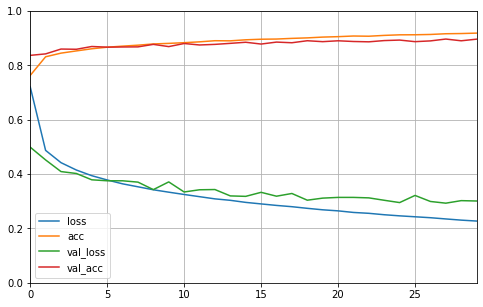

In [35]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [36]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 111us/sample - loss: 0.3303 - acc: 0.8858


[0.33033638232946394, 0.8858]

In [37]:
x_new = x_test[:3]

In [38]:
y_probs = model.predict(x_new)
y_probs.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [39]:
y_pred = model.predict_classes(x_new)
y_pred

array([9, 2, 1], dtype=int64)

In [40]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


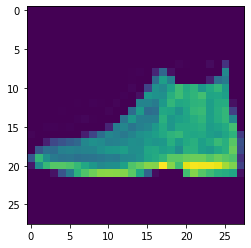

In [41]:
print(plt.imshow(x_test[0]))

AxesImage(54,36;334.8x217.44)


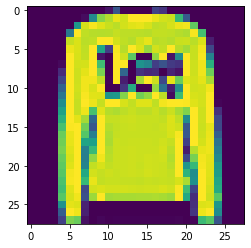

In [42]:
print(plt.imshow(x_test[1]))

AxesImage(54,36;334.8x217.44)


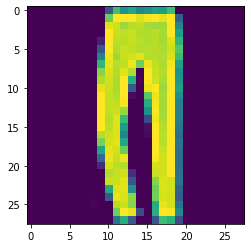

In [43]:
print(plt.imshow(x_test[2]))